In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')



In [2]:
!pip install kaggle


In [3]:
!kaggle datasets download -d omarsobhy14/global-hunger-index


global-hunger-index.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
df = pd.read_csv('Global hunger index.csv', encoding='ISO-8859-1')

df.head()


,Rank,Country,2000,2007,2014,2022,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,Belarus,<5,<5,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Bosnia & Herzegovina,9.3,6.6,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Chile,<5,<5,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN
3,4,China,13.3,7.8,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Croatia,<5,<5,<5,<5,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'], axis=1)
df.head()

,Rank,Country,2000,2007,2014,2022
0,1,Belarus,<5,<5,<5,<5
1,2,Bosnia & Herzegovina,9.3,6.6,<5,<5
2,3,Chile,<5,<5,<5,<5
3,4,China,13.3,7.8,<5,<5
4,5,Croatia,<5,<5,<5,<5


- Rank: The rank of the country based on the hunger index.
- Country: The name of the country.
- 2000, 2007, 2014, 2022: The hunger index of the country in these years.
- The values <5 in the year columns indicate that the hunger index is less than 5

**Explore Data**

- Let's proceed with the exploratory data analysis (EDA) to understand the data better.
- We'll start by checking the data types of the columns, looking for missing values, and getting some basic statistical details.

In [6]:
df.shape

(133, 6)

In [7]:
#check data types

df.dtypes

Rank       object
Country    object
2000       object
2007       object
2014       object
2022       object
dtype: object

In [8]:
df.isnull().sum()

Rank       10
Country    10
2000       10
2007       10
2014       10
2022       10
dtype: int64

In [9]:
df.duplicated().sum()

9

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     123 non-null    object
 1   Country  123 non-null    object
 2   2000     123 non-null    object
 3   2007     123 non-null    object
 4   2014     123 non-null    object
 5   2022     123 non-null    object
dtypes: object(6)
memory usage: 6.4+ KB


- The data types of all the columns are 'object', which means they are being treated as strings. 
- This is because the hunger index values are not purely numeric (they contain <5 to indicate values less than 5).
- There are no missing values in the dataset, which is good.
- However, to perform numerical analysis, we need to convert the hunger index values to numeric.
- We can replace <5 with 4.9 to approximate the values. 
    - We can interpret <5 as 4.9 for ease of analysis and be able to convert the columns to int type.
    - We can indentiy different variables based on which GHI is estimated and estimate the approx. GHI for that country. For instance https://www.globalhungerindex.org/methodology.html -  Refer this link since we do not have this data with us, we will skip imputing values. 
    - Next we can try sensitivity analysis, for example observe changes in our analysis by replacing 4.9 with 4.8, 4.7 etc. 
    - We can also assign regions to each country, for example Americas as region for all countries in south, central & south america, then take a median of the americas region and replace <5 with those values. 
    
   **I am going with the last option**

## Data Preparation & Cleaning

### Step 1: Handle <5 values in our data

#### 1.1 -> Add Column Region 

   - Create a mapping of countries to regions. I will prepare a dictionary where the keys are country names and the values are the corresponding region names.

- The I will add a new column to dataframe named region for each country with the map() function in pandas.

- Next, I will Group the data by region and calculate the median hunger index for each region. 

- Now for each row in the dataframe, if the hunger index is <5, I will replace it with the median value for the corresponding region.

- This method should give us more region-specific estimates for the <5 values rather than choosing an arbitary value below 5

In [11]:
regional_dictionary = {
    'Belarus': 'Eastern Europe',
    'Bosnia & Herzegovina': 'Southern Europe',
    'Chile': 'South America',
    'China': 'Eastern Asia',
    'Croatia': 'Southern Europe',
    'Estonia': 'Northern Europe',
    'Hungary': 'Eastern Europe',
    'Kuwait': 'Western Asia',
    'Latvia': 'Northern Europe',
    'Lithuania': 'Northern Europe',
    'Montenegro': 'Southern Europe',
    'North Macedonia': 'Southern Europe',
    'Romania': 'Eastern Europe',
    'Serbia': 'Southern Europe',
    'Slovak Republic': 'Eastern Europe',
    'Türkiye': 'Western Asia',
    'Uruguay': 'South America',
    'Costa Rica': 'Central America',
    'United Arab Emirates': 'Western Asia',
    'Brazil': 'South America',
    'Uzbekistan': 'Central Asia',
    'Georgia': 'Western Asia',
    'Mongolia': 'Eastern Asia',
    'Bulgaria': 'Eastern Europe',
    'Kazakhstan': 'Central Asia',
    'Tunisia': 'Northern Africa',
    'Albania': 'Southern Europe',
    'Russian Federation': 'Eastern Europe',
    'Iran (Islamic Republic of)': 'Southern Asia',
    'Saudi Arabia': 'Western Asia',
    'Argentina': 'South America',
    'Algeria': 'Northern Africa',
    'Armenia': 'Western Asia',
    'Moldova': 'Eastern Europe',
    'Jamaica': 'Caribbean',
    'Azerbaijan': 'Western Asia',
    'Ukraine': 'Eastern Europe',
    'Colombia': 'South America',
    'Peru': 'South America',
    'Kyrgyz Republic': 'Central Asia',
    'Paraguay': 'South America',
    'Mexico': 'Central America',
    'Panama': 'Central America',
    'El Salvador': 'Central America',
    'Dominican Republic': 'Caribbean',
    'Trinidad & Tobago': 'Caribbean',
    'Fiji': 'Melanesia',
    'Morocco': 'Northern Africa',
    'Turkmenistan': 'Central Asia',
    'Suriname': 'South America',
    'Guyana': 'South America',
    'Lebanon': 'Western Asia',
    'Jordan': 'Western Asia',
    'Cabo Verde': 'Western Africa',
    'Viet Nam': 'South-Eastern Asia',
    'Thailand': 'South-Eastern Asia',
    'Egypt': 'Northern Africa',
    'Malaysia': 'South-Eastern Asia',
    'South Africa': 'Southern Africa',
    'Oman': 'Western Asia',
    'Bolivia (Plurinational State of)': 'South America',
    'Honduras': 'Central America',
    'Mauritius': 'Eastern Africa',
    'Nicaragua': 'Central America',
    'Sri Lanka': 'Southern Asia',
    'Iraq': 'Western Asia',
    'Ghana': 'Western Africa',
    'Tajikistan': 'Central Asia',
    'Philippines': 'South-Eastern Asia',
    'Ecuador': 'South America',
    'Myanmar': 'South-Eastern Asia',
    'Senegal': 'Western Africa',
    'Eswatini': 'Southern Africa',
    "Côte d'Ivoire": 'Western Africa',
    'Cambodia': 'South-Eastern Asia',
    'Gabon': 'Middle Africa',
    'Indonesia': 'South-Eastern Asia',
    'Namibia': 'Southern Africa',
    'Guatemala': 'Central America',
    'Cameroon': 'Middle Africa',
    'Nepal': 'Southern Asia',
    'Lao PDR': 'South-Eastern Asia',
    'Solomon Islands': 'Melanesia',
    'Bangladesh': 'Southern Asia',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Botswana': 'Southern Africa',
    'Gambia': 'Western Africa',
    'Malawi': 'Eastern Africa',
    'Mauritania': 'Western Africa',
    'Djibouti': 'Eastern Africa',
    'Benin': 'Western Africa',
    'Togo': 'Western Africa',
    'Mali': 'Western Africa',
    'Kenya': 'Eastern Africa',
    'Tanzania (United Republic of)': 'Eastern Africa',
    'Burkina Faso': 'Western Africa',
    'Korea (DPR)': 'Eastern Asia',
    'Angola': 'Middle Africa',
    'Pakistan': 'Southern Asia',
    'Papua New Guinea': 'Melanesia',
    'Comoros': 'Eastern Africa',
    'Rwanda': 'Eastern Africa',
    'Nigeria': 'Western Africa',
    'Ethiopia': 'Eastern Africa',
    'Congo (Republic of)': 'Middle Africa',
    'Sudan': 'Northern Africa',
    'India': 'Southern Asia',
    'Zambia': 'Eastern Africa',
    'Afghanistan': 'Southern Asia',
    'Timor-Leste': 'South-Eastern Asia',
    'Guinea-Bissau': 'Western Africa',
    'Sierra Leone': 'Western Africa',
    'Lesotho': 'Southern Africa',
    'Liberia': 'Western Africa',
    'Niger': 'Western Africa',
    'Haiti': 'Caribbean',
    'Guinea, Mozambique, Uganda, and Zimbabwe': 'Multiple',
    'Chad': 'Middle Africa',
    'Dem. Rep. of the Congo': 'Middle Africa',
    'Madagascar': 'Eastern Africa',
    'Central African Rep.': 'Middle Africa',
    'Yemen': 'Western Asia',
    'Burundi': 'Eastern Africa',
    'Somalia': 'Eastern Africa',
    'South Sudan': 'Eastern Africa',
    'Syrian Arab Rep': 'Western Asia'
}


In [12]:
df['Region'] = df['Country'].map(regional_dictionary)
df

,Rank,Country,2000,2007,2014,2022,Region
0,1,Belarus,<5,<5,<5,<5,Eastern Europe
1,2,Bosnia & Herzegovina,9.3,6.6,<5,<5,Southern Europe
2,3,Chile,<5,<5,<5,<5,South America
3,4,China,13.3,7.8,<5,<5,Eastern Asia
4,5,Croatia,<5,<5,<5,<5,Southern Europe
...,...,...,...,...,...,...,...
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['Country'].value_counts().sum()

123

In [14]:
#df = df[:-9]
#df.tail(10)

In [15]:
# Define the new data
new_data = {
    "Rank": ["*", "*", "*", "*"],
    "Country": ["Burundi", "Somalia", "South Sudan", "Syrian Arab Rep."],
    "2000": [None, None, None, None],
    "2007": [None, None, None, None],
    "2014": [None, None, None, None],
    "2022": [None, None, None, None],
    "Region": ["Eastern Africa", "Eastern Africa", "Eastern Africa", "Western Asia"],
}

# Create a new DataFrame with the new data
new_df = pd.DataFrame(new_data)

# Append the new DataFrame to the original DataFrame
df = df.append(new_df, ignore_index=True)

# Remove the original row (if index of the row was 122)
df = df.drop(122)


In [16]:
df

,Rank,Country,2000,2007,2014,2022,Region
0,1,Belarus,<5,<5,<5,<5,Eastern Europe
1,2,Bosnia & Herzegovina,9.3,6.6,<5,<5,Southern Europe
2,3,Chile,<5,<5,<5,<5,South America
3,4,China,13.3,7.8,<5,<5,Eastern Asia
4,5,Croatia,<5,<5,<5,<5,Southern Europe
...,...,...,...,...,...,...,...
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,*,Burundi,None,None,None,None,Eastern Africa
134,*,Somalia,None,None,None,None,Eastern Africa
135,*,South Sudan,None,None,None,None,Eastern Africa


In [17]:
df.tail()

,Rank,Country,2000,2007,2014,2022,Region
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,*,Burundi,None,None,None,None,Eastern Africa
134,*,Somalia,None,None,None,None,Eastern Africa
135,*,South Sudan,None,None,None,None,Eastern Africa
136,*,Syrian Arab Rep.,None,None,None,None,Western Asia


In [18]:
df.head()

,Rank,Country,2000,2007,2014,2022,Region
0,1,Belarus,<5,<5,<5,<5,Eastern Europe
1,2,Bosnia & Herzegovina,9.3,6.6,<5,<5,Southern Europe
2,3,Chile,<5,<5,<5,<5,South America
3,4,China,13.3,7.8,<5,<5,Eastern Asia
4,5,Croatia,<5,<5,<5,<5,Southern Europe


### Convert the data to numeric (if required):

In [19]:
df['2000'] = pd.to_numeric(df['2000'], errors='coerce')
df['2007'] = pd.to_numeric(df['2007'], errors='coerce')
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')
df['2022'] = pd.to_numeric(df['2022'], errors='coerce')


In [20]:
df

,Rank,Country,2000,2007,2014,2022,Region
0,1,Belarus,NaN,NaN,NaN,NaN,Eastern Europe
1,2,Bosnia & Herzegovina,9.3,6.6,NaN,NaN,Southern Europe
2,3,Chile,NaN,NaN,NaN,NaN,South America
3,4,China,13.3,7.8,NaN,NaN,Eastern Asia
4,5,Croatia,NaN,NaN,NaN,NaN,Southern Europe
...,...,...,...,...,...,...,...
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,*,Burundi,NaN,NaN,NaN,NaN,Eastern Africa
134,*,Somalia,NaN,NaN,NaN,NaN,Eastern Africa
135,*,South Sudan,NaN,NaN,NaN,NaN,Eastern Africa


In [21]:
#median_values = df.groupby('Region').mean()
#median_values

In [22]:
selected_columns = ['2000', '2007', '2014', '2022']

# Fill missing values with 4.9 for the selected columns
df[selected_columns] = df[selected_columns].fillna(4.9)

# Print the updated DataFrame
df

,Rank,Country,2000,2007,2014,2022,Region
0,1,Belarus,4.9,4.9,4.9,4.9,Eastern Europe
1,2,Bosnia & Herzegovina,9.3,6.6,4.9,4.9,Southern Europe
2,3,Chile,4.9,4.9,4.9,4.9,South America
3,4,China,13.3,7.8,4.9,4.9,Eastern Asia
4,5,Croatia,4.9,4.9,4.9,4.9,Southern Europe
...,...,...,...,...,...,...,...
132,NaN,NaN,4.9,4.9,4.9,4.9,NaN
133,*,Burundi,4.9,4.9,4.9,4.9,Eastern Africa
134,*,Somalia,4.9,4.9,4.9,4.9,Eastern Africa
135,*,South Sudan,4.9,4.9,4.9,4.9,Eastern Africa


In [23]:
score_ranges = [0, 9.9, 19.9, 34.9, 49.9, 100]
categories = ['Low', 'Moderate', 'Serious', 'Alarming', 'Extremely Alarming']

# Add columns for each year based on the score categories
years = ['2000', '2007', '2014', '2022']
for year in years:
    column_name = 'Severity_Scale' + year
    df[column_name] = pd.cut(df[year], bins=score_ranges, labels=categories)

df

,Rank,Country,2000,2007,2014,2022,Region,Severity_Scale2000,Severity_Scale2007,Severity_Scale2014,Severity_Scale2022
0,1,Belarus,4.9,4.9,4.9,4.9,Eastern Europe,Low,Low,Low,Low
1,2,Bosnia & Herzegovina,9.3,6.6,4.9,4.9,Southern Europe,Low,Low,Low,Low
2,3,Chile,4.9,4.9,4.9,4.9,South America,Low,Low,Low,Low
3,4,China,13.3,7.8,4.9,4.9,Eastern Asia,Moderate,Low,Low,Low
4,5,Croatia,4.9,4.9,4.9,4.9,Southern Europe,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...
132,NaN,NaN,4.9,4.9,4.9,4.9,NaN,Low,Low,Low,Low
133,*,Burundi,4.9,4.9,4.9,4.9,Eastern Africa,Low,Low,Low,Low
134,*,Somalia,4.9,4.9,4.9,4.9,Eastern Africa,Low,Low,Low,Low
135,*,South Sudan,4.9,4.9,4.9,4.9,Eastern Africa,Low,Low,Low,Low


In [24]:
df[df['Region'] == 'Multiple']



,Rank,Country,2000,2007,2014,2022,Region,Severity_Scale2000,Severity_Scale2007,Severity_Scale2014,Severity_Scale2022
116,*,"Guinea, Mozambique, Uganda, and Zimbabwe",4.9,4.9,4.9,4.9,Multiple,Low,Low,Low,Low


In [25]:
df = df[df['Region'] != 'Multiple']
df

,Rank,Country,2000,2007,2014,2022,Region,Severity_Scale2000,Severity_Scale2007,Severity_Scale2014,Severity_Scale2022
0,1,Belarus,4.9,4.9,4.9,4.9,Eastern Europe,Low,Low,Low,Low
1,2,Bosnia & Herzegovina,9.3,6.6,4.9,4.9,Southern Europe,Low,Low,Low,Low
2,3,Chile,4.9,4.9,4.9,4.9,South America,Low,Low,Low,Low
3,4,China,13.3,7.8,4.9,4.9,Eastern Asia,Moderate,Low,Low,Low
4,5,Croatia,4.9,4.9,4.9,4.9,Southern Europe,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...
132,NaN,NaN,4.9,4.9,4.9,4.9,NaN,Low,Low,Low,Low
133,*,Burundi,4.9,4.9,4.9,4.9,Eastern Africa,Low,Low,Low,Low
134,*,Somalia,4.9,4.9,4.9,4.9,Eastern Africa,Low,Low,Low,Low
135,*,South Sudan,4.9,4.9,4.9,4.9,Eastern Africa,Low,Low,Low,Low


In [26]:
df['% Change 2000-2007'] = ((df['2007'] - df['2000']) / df['2000']) * 100
df['% Change 2007-2014'] = ((df['2014'] - df['2007']) / df['2007']) * 100
df['% Change 2014-2022'] = ((df['2022'] - df['2014']) / df['2014']) * 100
df['% Change Over 2022 Years'] = ((df['2022'] - df['2014']) / df['2014']) * 100

In [27]:
df

,Rank,Country,2000,2007,2014,2022,Region,Severity_Scale2000,Severity_Scale2007,Severity_Scale2014,Severity_Scale2022,% Change 2000-2007,% Change 2007-2014,% Change 2014-2022,% Change Over 2022 Years
0,1,Belarus,4.9,4.9,4.9,4.9,Eastern Europe,Low,Low,Low,Low,0.000000,0.000000,0.0,0.0
1,2,Bosnia & Herzegovina,9.3,6.6,4.9,4.9,Southern Europe,Low,Low,Low,Low,-29.032258,-25.757576,0.0,0.0
2,3,Chile,4.9,4.9,4.9,4.9,South America,Low,Low,Low,Low,0.000000,0.000000,0.0,0.0
3,4,China,13.3,7.8,4.9,4.9,Eastern Asia,Moderate,Low,Low,Low,-41.353383,-37.179487,0.0,0.0
4,5,Croatia,4.9,4.9,4.9,4.9,Southern Europe,Low,Low,Low,Low,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,NaN,NaN,4.9,4.9,4.9,4.9,NaN,Low,Low,Low,Low,0.000000,0.000000,0.0,0.0
133,*,Burundi,4.9,4.9,4.9,4.9,Eastern Africa,Low,Low,Low,Low,0.000000,0.000000,0.0,0.0
134,*,Somalia,4.9,4.9,4.9,4.9,Eastern Africa,Low,Low,Low,Low,0.000000,0.000000,0.0,0.0
135,*,South Sudan,4.9,4.9,4.9,4.9,Eastern Africa,Low,Low,Low,Low,0.000000,0.000000,0.0,0.0


In [28]:
avg_hunger_by_region_year = df.groupby(['Region'])['2000', '2007', '2014', '2022'].mean()
avg_hunger_by_region_year

,2000,2007,2014,2022
Region,,,,
Caribbean,18.875000,18.600000,15.000000,14.375000
Central America,17.585714,14.385714,11.857143,10.814286
Central Asia,22.820000,17.620000,10.940000,8.540000
Eastern Africa,33.369231,27.115385,21.907692,20.546154
Eastern Asia,27.600000,19.733333,13.866667,11.833333
Eastern Europe,9.462500,8.000000,6.087500,5.787500
Melanesia,21.066667,18.833333,20.200000,18.366667
Middle Africa,43.400000,38.228571,30.485714,29.871429
Northern Africa,12.360000,10.700000,13.780000,12.660000


In [29]:
new_df = df[['Region', 'Country', '2000', '2007', '2014', '2022','Severity_Scale2000', 'Severity_Scale2007', 'Severity_Scale2014', 'Severity_Scale2022']]
new_df

new_df.to_csv('GHICleanData0.csv', index=False)

### Note: I have saved the new data in the dataframe new_df and will contintue further analysis on this. 
    
    

In [30]:
#lets read the data

new_df

,Region,Country,2000,2007,2014,2022,Severity_Scale2000,Severity_Scale2007,Severity_Scale2014,Severity_Scale2022
0,Eastern Europe,Belarus,4.9,4.9,4.9,4.9,Low,Low,Low,Low
1,Southern Europe,Bosnia & Herzegovina,9.3,6.6,4.9,4.9,Low,Low,Low,Low
2,South America,Chile,4.9,4.9,4.9,4.9,Low,Low,Low,Low
3,Eastern Asia,China,13.3,7.8,4.9,4.9,Moderate,Low,Low,Low
4,Southern Europe,Croatia,4.9,4.9,4.9,4.9,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...
132,NaN,NaN,4.9,4.9,4.9,4.9,Low,Low,Low,Low
133,Eastern Africa,Burundi,4.9,4.9,4.9,4.9,Low,Low,Low,Low
134,Eastern Africa,Somalia,4.9,4.9,4.9,4.9,Low,Low,Low,Low
135,Eastern Africa,South Sudan,4.9,4.9,4.9,4.9,Low,Low,Low,Low


In [31]:
#check missing data

new_df.isnull().sum()

Region                10
Country               10
2000                   0
2007                   0
2014                   0
2022                   0
Severity_Scale2000     0
Severity_Scale2007     0
Severity_Scale2014     0
Severity_Scale2022     0
dtype: int64

In [32]:
missing_values_rows = new_df[new_df.isnull().any(axis=1)]
print('Rows with missing values:')
print(missing_values_rows)

Rows with missing values:
    Region Country  2000  2007  2014  2022 Severity_Scale2000  \
123    NaN     NaN   4.9   4.9   4.9   4.9                Low   
124    NaN     NaN   4.9   4.9   4.9   4.9                Low   
125    NaN     NaN   4.9   4.9   4.9   4.9                Low   
126    NaN     NaN   4.9   4.9   4.9   4.9                Low   
127    NaN     NaN   4.9   4.9   4.9   4.9                Low   
128    NaN     NaN   4.9   4.9   4.9   4.9                Low   
129    NaN     NaN   4.9   4.9   4.9   4.9                Low   
130    NaN     NaN   4.9   4.9   4.9   4.9                Low   
131    NaN     NaN   4.9   4.9   4.9   4.9                Low   
132    NaN     NaN   4.9   4.9   4.9   4.9                Low   

    Severity_Scale2007 Severity_Scale2014 Severity_Scale2022  
123                Low                Low                Low  
124                Low                Low                Low  
125                Low                Low                Low  
126   

In [33]:
#### Observation: Country and Region have missing data. Hunger Index data alone is not useful unless we have corresponding country/region data. Lets drop the rows. 



In [34]:
new_df = new_df.dropna(subset=['Country']) #drop country

new_df.isnull().sum()


Region                0
Country               0
2000                  0
2007                  0
2014                  0
2022                  0
Severity_Scale2000    0
Severity_Scale2007    0
Severity_Scale2014    0
Severity_Scale2022    0
dtype: int64

In [35]:
new_df.duplicated().sum()

0

# Data Analysis

In [36]:
# Set color palette
sns.set_palette(['black','grey','darkgrey','darkslategray','silver'])


In [37]:
#lets calculate average hunger index by year

avg_ghi = new_df[['2000', '2007','2014','2022']].mean()
avg_ghi

2000    23.4864
2007    19.9184
2014    16.1408
2022    15.1488
dtype: float64

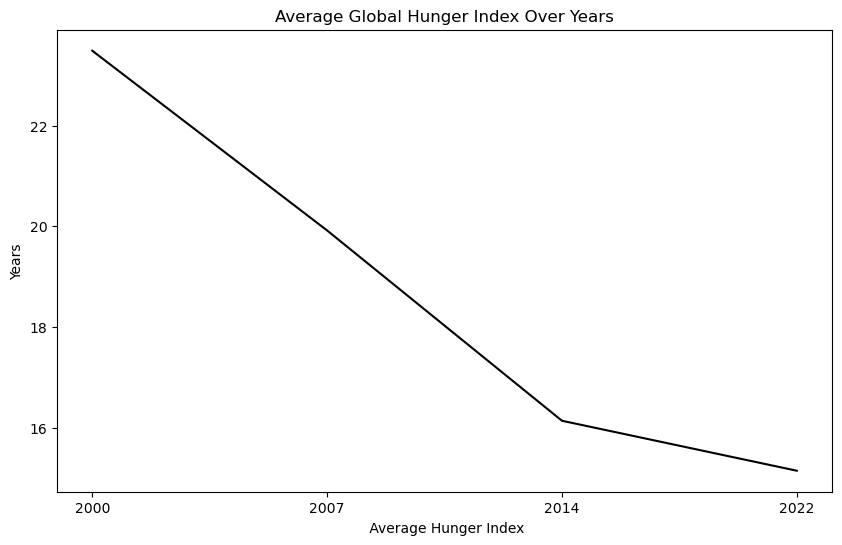

In [38]:
#plot the avg hunger index change over years

plt.figure(figsize=(10,6))
sns.lineplot(y=avg_ghi, x=(['2000', '2007','2014','2022']))
plt.title('Average Global Hunger Index Over Years')
plt.xlabel(' Average Hunger Index')
plt.ylabel('Years')
plt.show()

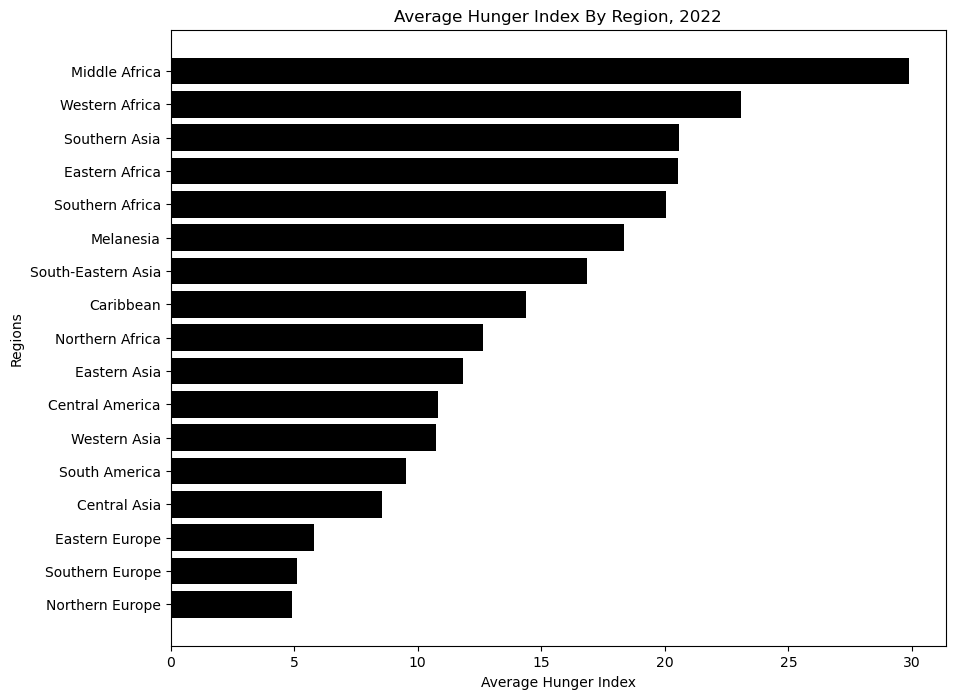

In [39]:
#Trend Analysis: Average Hunger Index By Region, 2022

avg_ghi_region_2022 = new_df.groupby('Region')['2022'].mean().sort_values(ascending=True)
plt.figure(figsize=(10,8))
plt.title('Average Hunger Index By Region, 2022')
plt.barh(avg_ghi_region_2022.index,avg_ghi_region_2022.values)
plt.xlabel('Average Hunger Index')
plt.ylabel('Regions')
plt.show()

In [40]:
# Comparative Analysis: Average Hunger Index by Region for All Years


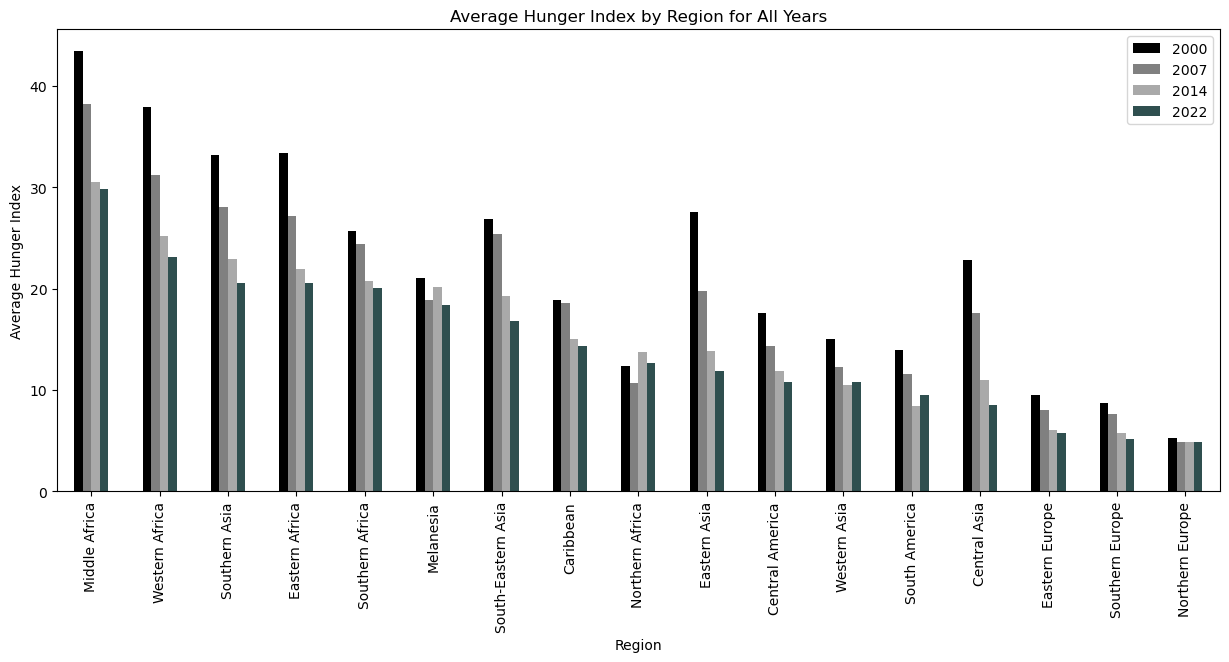

In [41]:
avg_ghi_allyears = new_df.groupby('Region')[['2000', '2007', '2014', '2022']].mean()
avg_ghi_allyears = avg_ghi_allyears.sort_values('2022', ascending=False)
avg_ghi_allyears.plot(kind='bar', figsize=(15,6))
bar_width = 1 
plt.title('Average Hunger Index by Region for All Years')
plt.xlabel('Region')
plt.ylabel('Average Hunger Index')
plt.show()


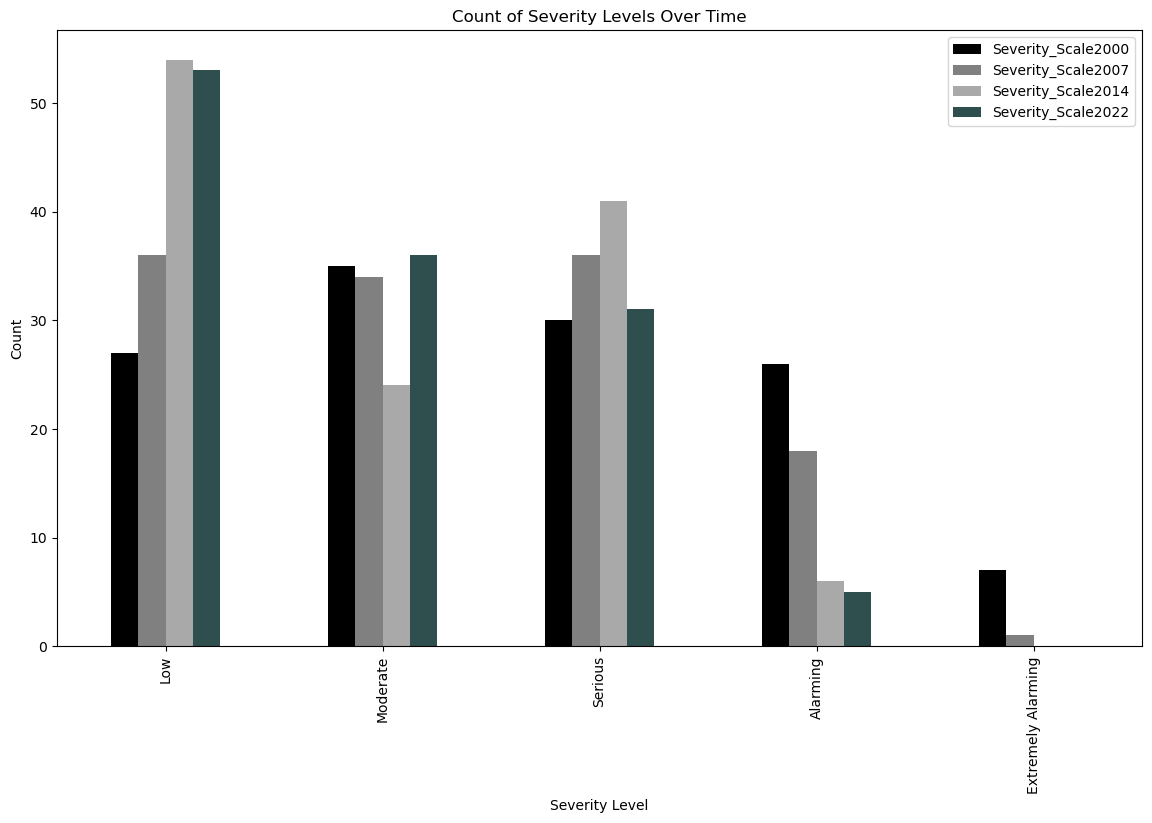

In [42]:
#Analysis of Hunger Severity Over Time

severityanalysis = new_df[['Severity_Scale2000', 'Severity_Scale2007', 'Severity_Scale2014',
       'Severity_Scale2022']].apply(pd.Series.value_counts)
severityanalysis = severityanalysis.sort_index(ascending=True)
severityanalysis.plot(kind='bar', figsize=(14, 8))
plt.title('Count of Severity Levels Over Time')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

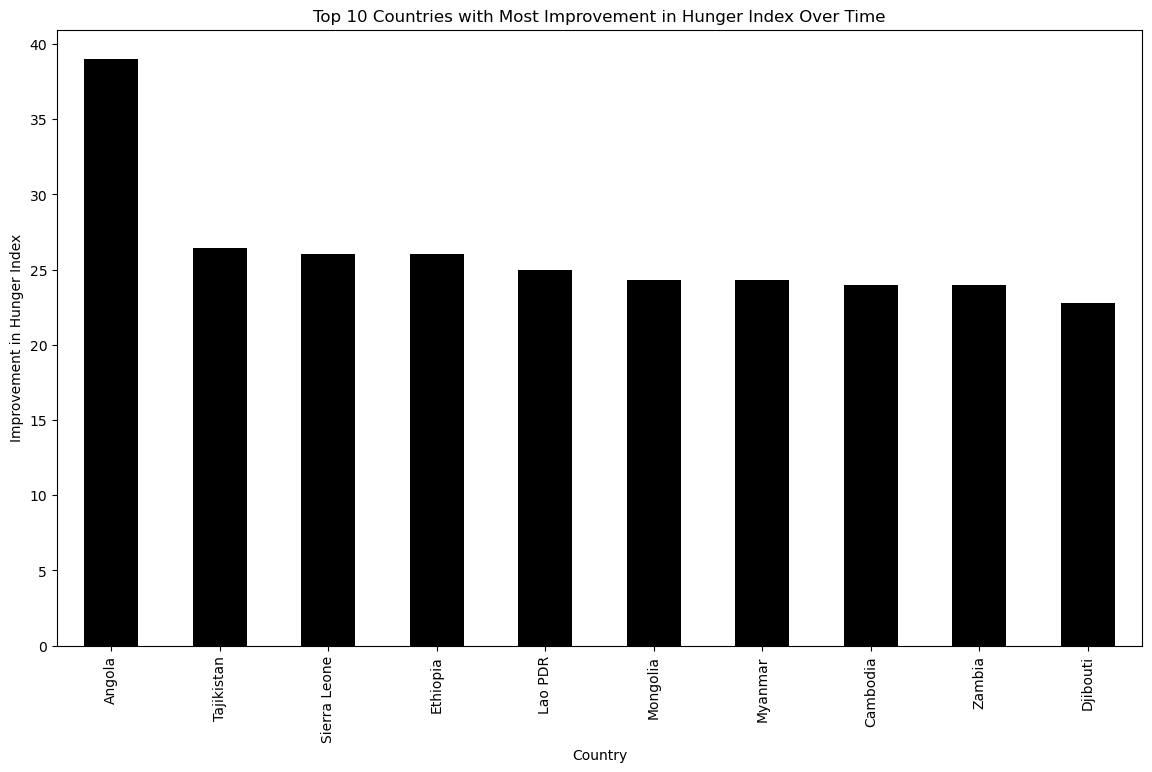

In [43]:
#Analyze Improvements Over Time

new_df['Improvement'] = new_df['2000'] - new_df['2022']
top_improve_countries = new_df.sort_values('Improvement', ascending=False).head(10)
top_improve_countries.set_index('Country')['Improvement'].plot(kind='bar', figsize=(14,8))
plt.title('Top 10 Countries with Most Improvement in Hunger Index Over Time')
plt.ylabel('Improvement in Hunger Index')
plt.xlabel('Country')
plt.show()

## Observations & Summary


- Trends Over Time: The average Global Hunger Index (GHI) has decreased over time, indicating improvements in addressing hunger worldwide. However, the rate of improvement varies across different countries and regions.

-  Severity Analysis: The severity of hunger has also improved over time, with fewer countries falling into the 'Alarming' and 'Extremely Alarming' categories in recent years. However, a significant number of countries still fall into the 'Serious' category.

-  Regional Analysis: Sub-Saharan Africa and South Asia are the regions with the highest average GHI, indicating severe hunger problems. On the other hand, regions like Latin America & Caribbean, East & Southeast Asia, and Eastern Europe & Central Asia have lower average GHI, indicating less severe hunger problems.

-  Country Analysis: Countries like Malawi, Djibouti, Togo, Mali, and Tanzania have shown significant improvement in reducing their GHI over time. However, countries like Burundi, Somalia, and South Sudan still have high GHI, indicating severe hunger problems.